In [4]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def alpha_bar(x):
    return 1/8*(x + 1)**2

def eigen_generator(n):  # generates eigen values, returns float
    # n >= 1
    return 1 / ((n-0.5)**2 * np.pi**2)

def eigen_func(x, lambda_n):  # generates the eigen functions evaluated at an x_array, returns array
    # n >= 1
    return np.sqrt(2)*np.sin(x / np.sqrt(lambda_n))

eigen_func = np.vectorize(eigen_func)
alpha_bar = np.vectorize(alpha_bar)

def karhunen_loueve(eigen_values, eigen_function_values):  # sums eigen functions and eigen values, returns array
    n = len(eigen_values)  # number of terms to add
    sum = 0
    
    for i in range(n):
        sum += np.sqrt(eigen_values[i]) * eigen_function_values[:,i] * np.random.normal()
        
    return sum
        
def variance_calculator(eigen_values, x):  # calcualtes variance at a specific x lcoation, returns float
    sum = 0
    n = len(eigen_values)
    for i in range(n):
        sum += eigen_values[i]* eigen_func(x, eigen_values[i])**2
      
    return sum
    

In [19]:
first_3_eigens  = eigen_generator(np.arange(1,3+1))

x_domain = np.linspace(0,1,201)
y_values = np.zeros((201, 3))   # rows are location, columns are eigen function number

for i in range(3):  # generate the eigenfunctions from [0, 1] 
    y_values[:,i] = eigen_func(x_domain, first_3_eigens[i])
    
mean_alpha = alpha_bar(x_domain)


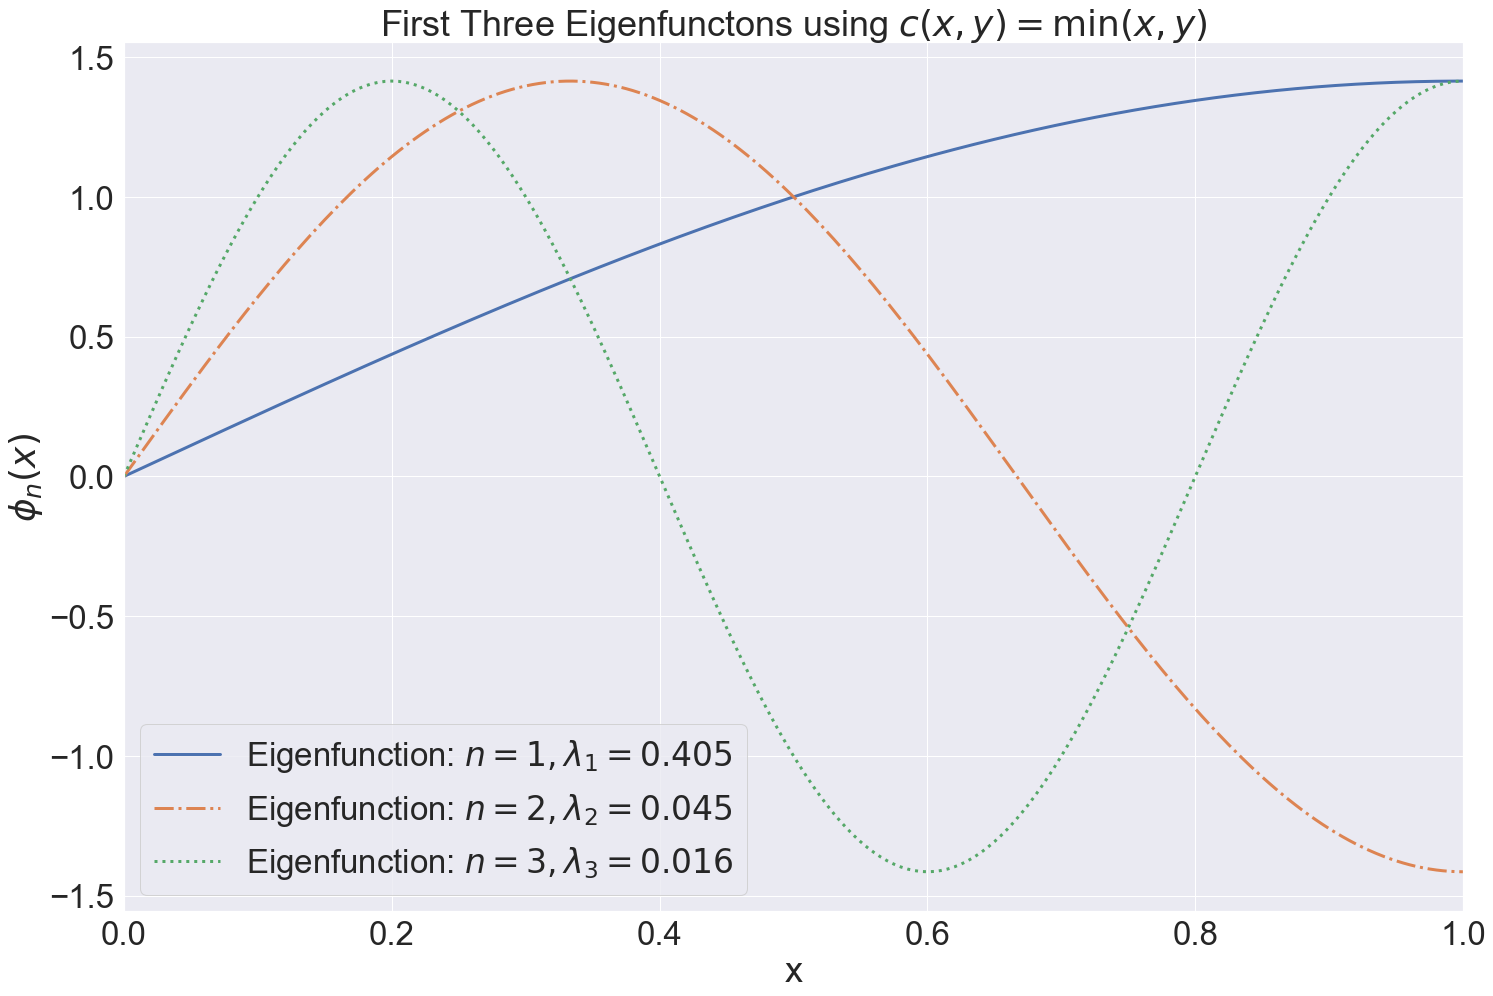

In [28]:
sns.set(font_scale=3)
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))

linestyles =['-','-.', ':' ]

for i in range(3):
    plt.plot(x_domain, y_values[:,i], ls=linestyles[i],linewidth=3,label=r'Eigenfunction: $ n={},\lambda_{{{}}}= {{{:0.3f}}}$'.format(i+1,i+1,first_3_eigens[i]))
plt.legend()
ax.set_xlim((0,1))
ax.set_xlabel('x')
ax.set_ylabel(r'$\phi_n(x)$')

plt.title(r'First Three Eigenfunctons using $c(x,y)= {\mathrm{min}}(x,y)$');


In [21]:

realizations = 1000

realization_array = np.zeros((realizations, x_domain.shape[0]))

for i in range(realizations):
    realization_array[i,:]=mean_alpha + karhunen_loueve(first_3_eigens, y_values)
    

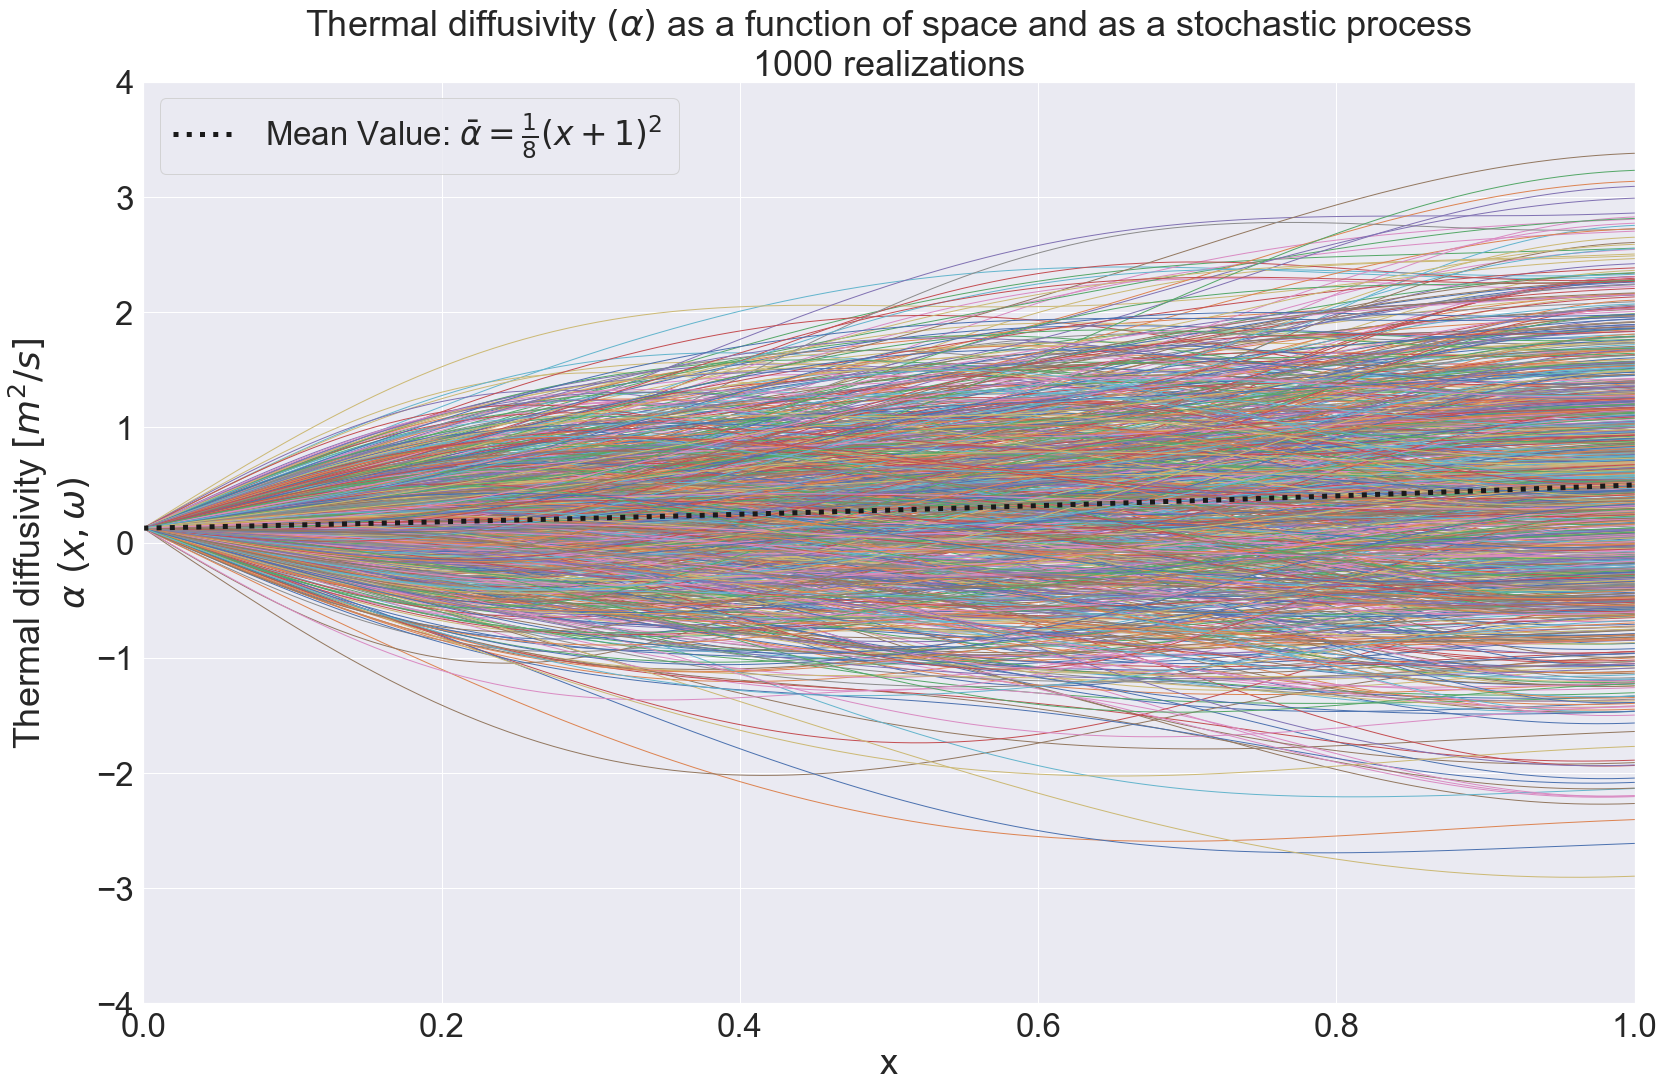

In [22]:
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
ax.set_ylim(-4,4)
ax.set_xlim(0,1)
for i in range(realizations):
    plt.plot(x_domain,realization_array[i,:], linewidth=1)
    
plt.plot(x_domain, mean_alpha, linewidth=5, ls=':', c='k', label=r'Mean Value: $\bar{\alpha}=\frac{1}{8}(x+1)^2$ ')    
ax.set_xlabel('x')
ax.set_ylabel('Thermal diffusivity ' + r'$ [m^2/s]$' +'\n' + r'$\alpha \ (x,\omega)$');
ax.set_title(r'Thermal diffusivity $(\alpha)$ as a function of space and as a stochastic process' + f'\n{realizations} realizations');
plt.legend(loc=2);
fig.tight_layout()
plt.savefig('realizations_of_diffusivity')

###  <center> KDE, Normalized  Histogram, and Normal Approximation at $x$ <center/>
###  <center>  $\beta \ (\bar{x}, \omega) = \sum_{i=1}^{3} \sqrt{\lambda_n} \phi_n({\bar{x}})Q_n(\omega) \ |_{\ \bar{x}=0.5}$ <center/>
    
### $$\mathrm{var} \left(\sum_{i=1}^{n} a_iX_i\right) =\sum_{i=1}^{n} a_{i}^2 \mathrm{var}(X_i) $$
    
## $$\rightarrow \mathrm{var}(\beta \ (0.5, \omega)) =  \sum_{i=1}^{3} {\lambda_n} \phi_n({0.5})^2  \ \mathrm{var} \left(Q_n(\omega) \right) =  \sum_{i=1}^{3} {\lambda_n} \phi_n({0.5})^2  $$

## <center> Using: $Q_n(\omega) \sim \mathcal{N}(\mu =0, \sigma^2=1)$ <center/>

In [23]:
var_with_3_eigens = variance_calculator(first_3_eigens, 0.5)
sd_with_3_eigns = np.sqrt(var_with_3_eigens)

0.6830283750522358

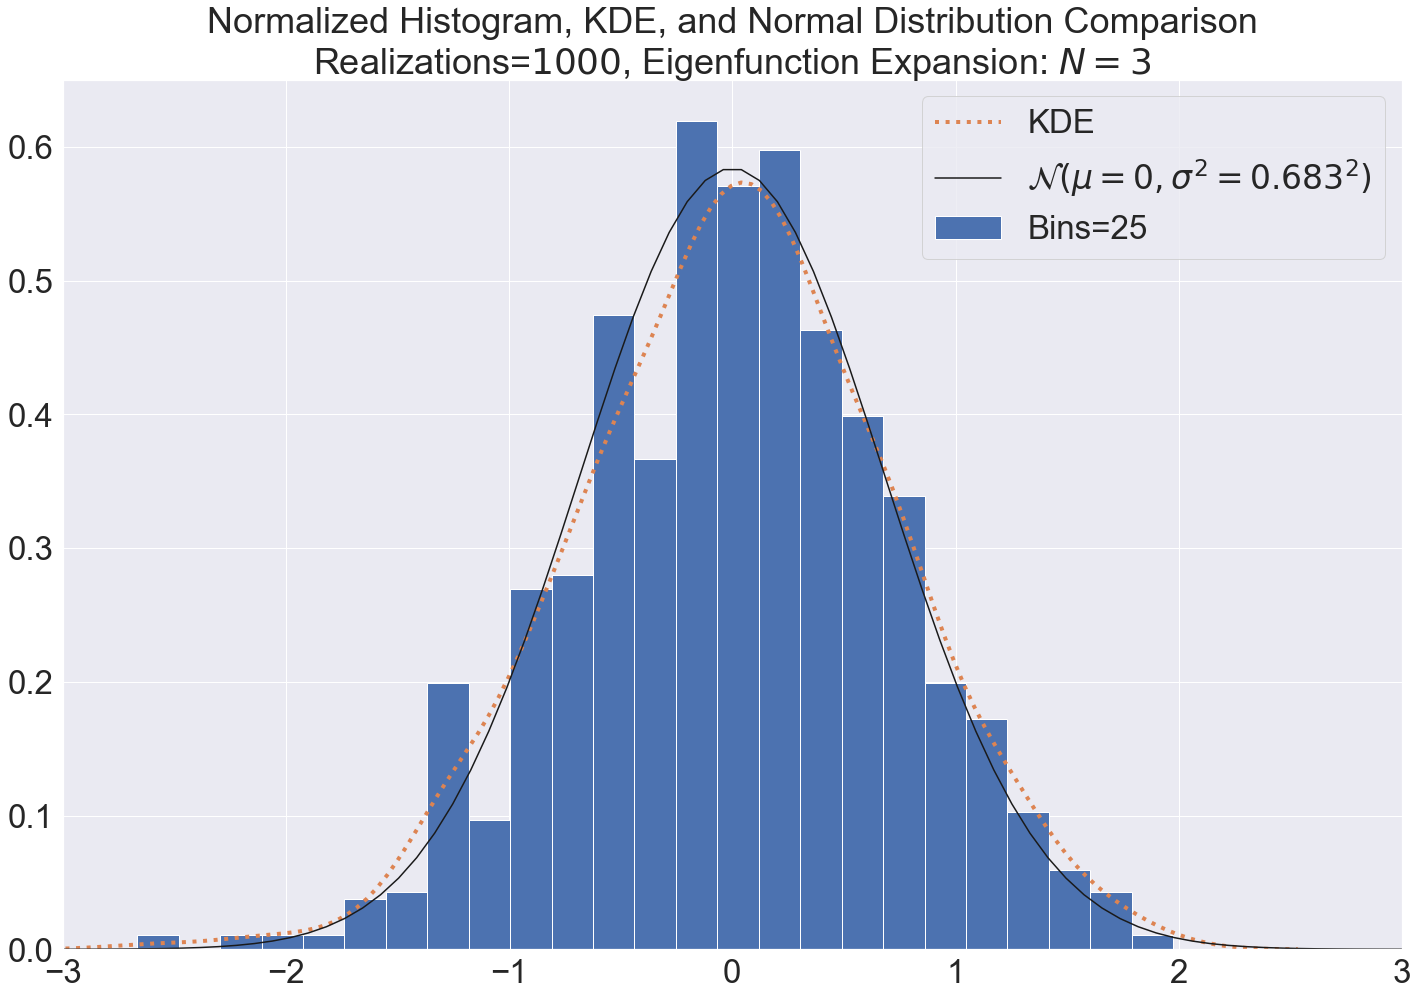

In [24]:
beta_half_point = realization_array[:,100] - alpha_bar(0.5)   # Expansion - mean of alpha

gaussian_range = np.linspace(-4,4,100)
gaussian_pdf_3_eigens = scipy.stats.norm.pdf(gaussian_range, loc=0, scale=sd_with_3_eigns)
bin_count = 25

fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
(bin_values, _, _) = plt.hist(beta_half_point, bins=bin_count, stacked=True, density=True,
                              label=f'Bins={bin_count}')  # plot Normalized Histogram
sns.kdeplot(beta_half_point, label='KDE', linestyle=':', linewidth=4)  # plot KDE  of sample distribution
plt.plot(gaussian_range, gaussian_pdf_3_eigens, label=r'$\mathcal{{N}}(\mu =0, \sigma^2={{{0:0.3f}}}^2)$'.format(sd_with_3_eigns), c='k')

ax.set_xlim(-3,3)
plt.title('Normalized Histogram, KDE, and Normal Distribution Comparison\n' + r'Realizations=${{{}}}$, Eigenfunction Expansion: $N= 3$'.format(realizations))
plt.legend();

In [25]:
first_6_eigens  = eigen_generator(np.arange(1,6+1))

y_values_6 = np.zeros((201, 6))

for i in range(6):  # generate the eigenfunctions from [0, 1] 
    y_values_6[:,i] = eigen_func(x_domain, first_6_eigens[i])

realization_array_6 = np.zeros((realizations, x_domain.shape[0]))

for i in range(realizations):
    realization_array_6[i,:]=mean_alpha + karhunen_loueve(first_6_eigens, y_values_6)    
    
beta_half_point_6 = realization_array_6[:,100] - alpha_bar(0.5)   # Expansion - mean of alpha

var_with_6_eigens = variance_calculator(first_6_eigens, 0.5)
sd_with_6_eigns = np.sqrt(var_with_6_eigens)

0.6950912558911944

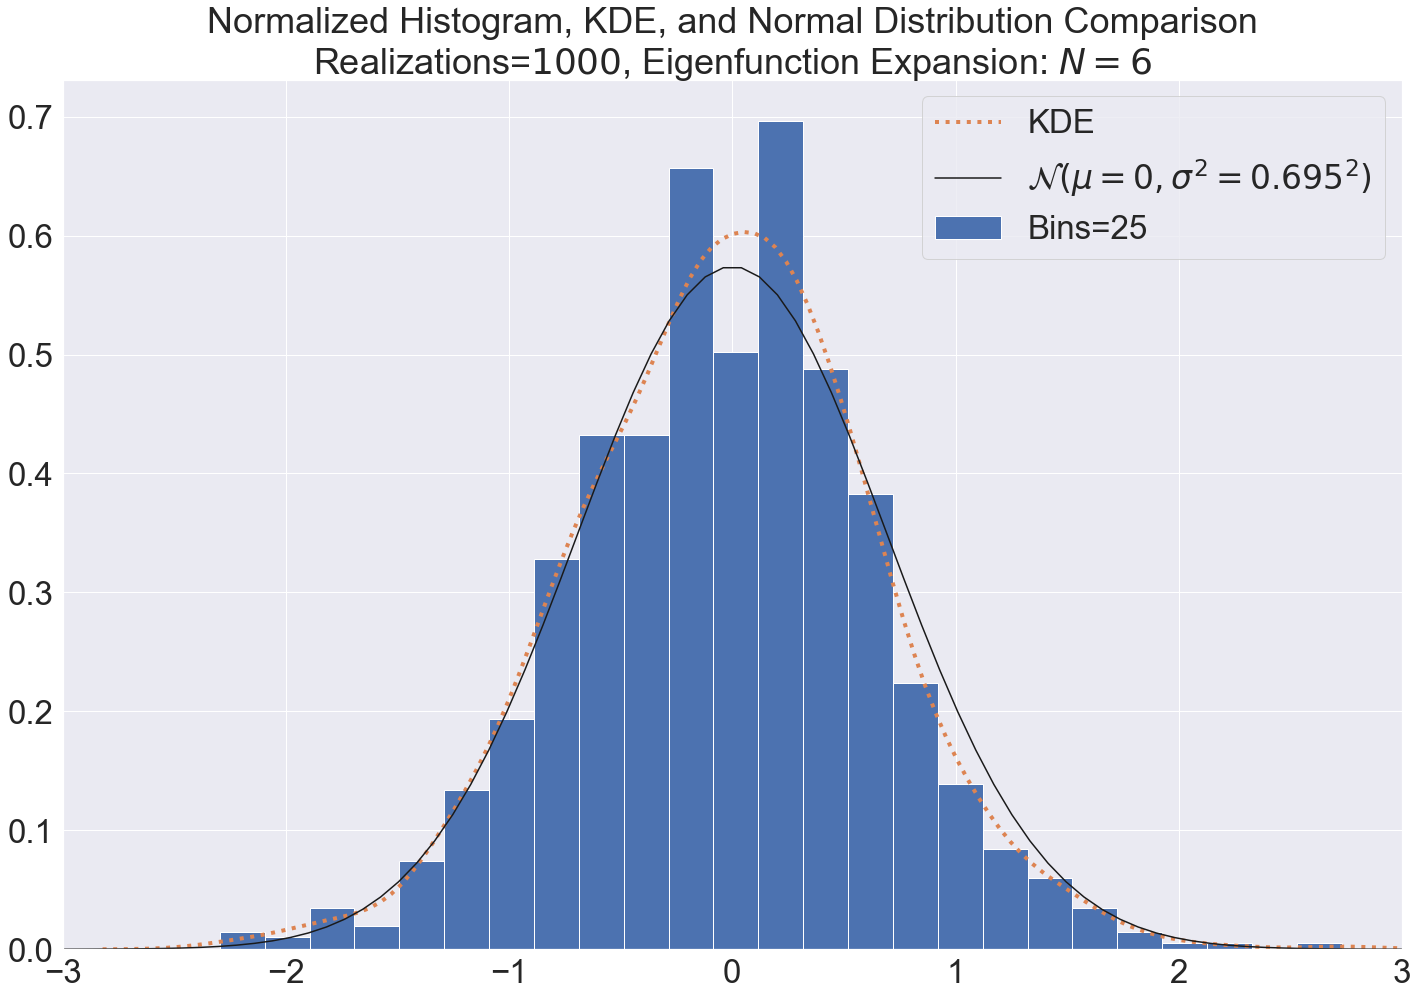

In [26]:
gaussian_pdf_6_eigens = scipy.stats.norm.pdf(gaussian_range, loc=0, scale=sd_with_6_eigns)
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
(bin_values, _, _) = plt.hist(beta_half_point_6, bins=bin_count, stacked=True, density=True,
                              label=f'Bins={bin_count}')  # plot Normalized Histogram
sns.kdeplot(beta_half_point_6, label='KDE', linestyle=':', linewidth=4)  # plot KDE  of sample distribution
plt.plot(gaussian_range, gaussian_pdf_6_eigens, label=r'$\mathcal{{N}}(\mu =0, \sigma^2={{{0:0.3f}}}^2)$'.format(sd_with_6_eigns), c='k')

ax.set_xlim(-3,3)
plt.title('Normalized Histogram, KDE, and Normal Distribution Comparison\n' + r'Realizations=${{{}}}$, Eigenfunction Expansion: $N= 6$'.format(realizations))
plt.legend();

#### <center> Now consider the exponential covariance function <center/>

In [29]:
L = 5

def transcend_eq_1(w):
    # for even n
    return L*w + np.tan(w) 

def transcend_eq_2(v):
    # for odd n
    return 1-L*v*np.tan(v) 

# def eigen_generator(n):  # generates eigen values, returns float
#     # n >= 1
#     return 1 / ((n-0.5)**2 * np.pi**2)

# def eigen_func(x, lambda_n):  # generates the eigen functions evaluated at an x_array, returns array
#     # n >= 1
#     return np.sqrt(2)*np.sin(x / np.sqrt(lambda_n))

In [72]:
x_search = np.arange(0, 100, 0.1)
unique_roots_eq_1 = {0}

for i in range(x_search.shape[0]):
    unique_roots_eq_1.add(round(scipy.optimize.fsolve(transcend_eq_1, x_search[i])[0],5))
                     
unique_roots_eq_1 = np.array(list(unique_roots_eq_1))
unique_roots_eq_1 = unique_roots_eq_1[unique_roots_eq_1 > 0]
unique_roots_eq_1

array([ 1.68868,  4.75443,  7.87936, 11.01373, 14.1513 , 17.29033,
       20.43014, 23.57043, 26.71102, 29.85183, 32.99278, 36.13385,
       39.275  , 42.41622, 45.55748, 48.69879, 51.84014, 54.98151,
       58.12291, 61.26432, 67.5472 , 70.68866, 73.83014, 76.97162,
       83.25461, 86.39611, 89.53762, 92.67914, 98.96219])

In [1]:
### PROBLEM 3 ###

In [23]:
kl_data_file = open("./KL_data.txt")
kl_data = np.genfromtxt(kl_data_file)
#y = kl_data[:,1]

0.3730671

In [59]:
def alpha_bar_3(x,q):
    return q[0] + q[1] * x + q[2] * x**2

def alpha_3(x, q):
    expansion = 0
    for n in range(1,4):

        lambda_n = eigen_generator(n)
        expansion += np.sqrt( lambda_n ) * eigen_func(x,lambda_n)
    
    sum([ 
        np.sqrt(eigen_generator(n)) * eigen_func(n, x) 
        for n in range(1,4)
    ])
    
    alpha_bar = alpha_bar_3(x,q)
    return expansion + alpha_bar

In [60]:
from scipy import optimize
def least_squares(q):
    sum = 0
    for j in range(1,22):
        #print(alpha_3( 0.05*(j-1), q ))
        sum += ( y[j-1] - alpha_3( 0.05*(j-1), q ) )**2
    
    return sum

qopt = optimize.fmin(least_squares, x0 = [1,1,1])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sin
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Optimization terminated successfully.
         Current function value: 0.156963
         Iterations: 97
         Function evaluations: 181


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sin
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


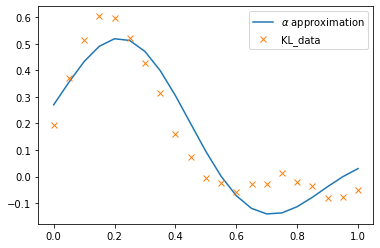

In [63]:
import matplotlib.pyplot as plt
xs = [ 0.05*(j-1) for j in range(1,22) ]
approx_ys = [ alpha_3(x, qopt) for x in xs ]
approx_alpha_bars = [ alpha_bar_3(x, qopt) for x in xs ]

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(xs, approx_ys, label = r"$\alpha$ approximation")
ax.plot(xs, y, marker="x", linestyle="", label = "KL_data")
#ax.plot(xs, approx_alpha_bars)
ax.legend()

